##**Heart Disease**##

**About Dataset**

**Context**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.




##**Report Structure**##

Title: "Hyperparameter Optimization Using GridSearchCV for Multiple Machine Learning Algorithms"

##**Introduction:**##
Briefly explain the purpose of hyperparameter tuning.
Mention the algorithms you're comparing (Logistic Regression, Decision Tree, Random Forest, XGboost,CatBoost,AdaBoost).
State the dataset used (heart Disease).
##**Methodology:**##
Describe the GridSearchCV approach.
Specify the parameter grids used for each algorithm.
Mention the evaluation metric used (accuracy).
##**Results:**##
Present a table summarizing the best parameters and corresponding accuracy scores for each algorithm.
##**Discussion:**##
Analyze the results. Which algorithm performed best?
Discuss the impact of different hyperparameters on model performance.
##**Conclusion:**##
Summarize the key findings.
Discuss potential limitations and future work.

##**Step 1: Import Libraries**##

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier , XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

##**Step 2: Read the Dataset**##

In [9]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##**Step 3: Preprocessing**##

In [12]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


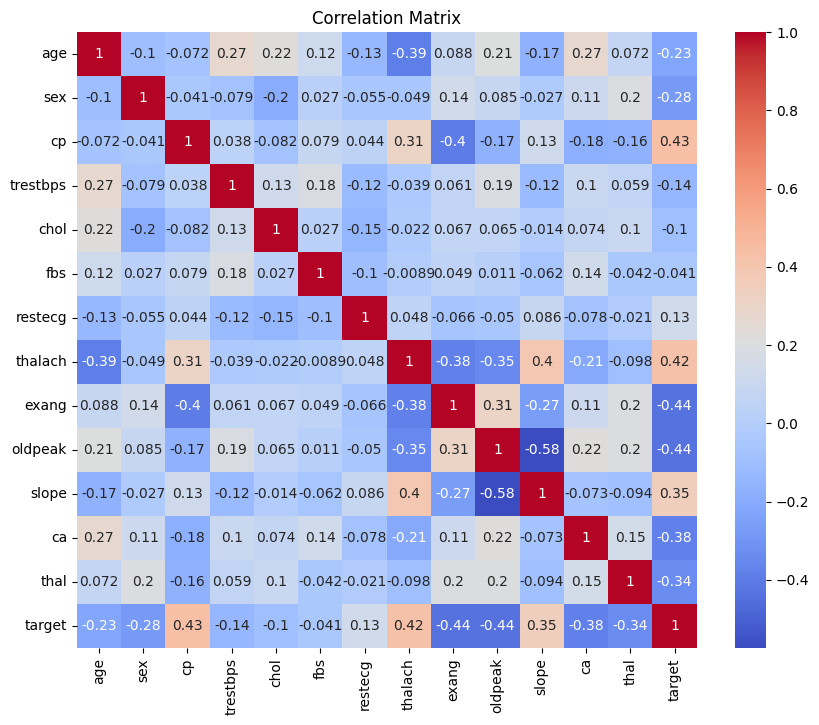

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##**Step 4: Split the Dataset**##

In [16]:
X=df.drop('target',axis=1)
y=df['target']

##**Step 5: Define Your Algorithms and Parameter Grids**##

In [18]:
# Define your algorithms and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'max_iter': [100, 200, 300]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15],
            'criterion': ['gini', 'entropy']
        }
    },
    'Catboost': {
        'model': CatBoostClassifier(),
        'param_grid': {
            'learning_rate': [0.01, 0.1, 0.2],
            'depth': [4, 6, 8],
            'iterations': [100, 200, 300],

        }
    },
    'XGboost': {
        'model': XGBClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [100, 200, 300]

        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],

        }
    }

}

##**Step 6: Train Grid Search for Each Algorithm**##

In [24]:
results = {}
for model_name, model_params in models.items():
    grid_search = GridSearchCV(model_params['model'], model_params['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    results[model_name] = {

        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_model': grid_search.best_estimator_
    }


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Streaming output truncated to the last 5000 lines.
100:	learn: 0.0040120	total: 274ms	remaining: 268ms
101:	learn: 0.0039616	total: 276ms	remaining: 265ms
102:	learn: 0.0039075	total: 279ms	remaining: 262ms
103:	learn: 0.0038579	total: 284ms	remaining: 262ms
104:	learn: 0.0038134	total: 288ms	remaining: 261ms
105:	learn: 0.0037775	total: 291ms	remaining: 258ms
106:	learn: 0.0037366	total: 293ms	remaining: 255ms
107:	learn: 0.0036830	total: 296ms	remaining: 252ms
108:	learn: 0.0036408	total: 298ms	remaining: 249ms
109:	learn: 0.0036015	total: 301ms	remaining: 246ms
110:	learn: 0.0035467	total: 303ms	remaining: 243ms
111:	learn: 0.0035138	total: 306ms	remaining: 240ms
112:	learn: 0.0034777	total: 308ms	remaining: 237ms
113:	learn: 0.0034385	total: 311ms	remaining: 234ms
114:	learn: 0.0033997	total: 313ms	remaining: 231ms
115:	learn: 0.0033620	total: 315ms	remaining: 228ms
116:	learn: 0.0033176	total: 318ms	remaining: 226ms
117:	learn: 0.0032795	total: 320ms	remaining: 223ms
118:	learn: 0

##**Step 7: Evaluate and Compare Results**##

In [30]:
for model_name, model_params in results.items():
    print(f"Performing Grid Search for {model_name}")
    print(f"Best Parameters: {model_params['best_params']}")
    print(f"Best Accuracy: {model_params['best_score']}")
    print('*****'*10)


Performing Grid Search for Logistic Regression
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best Accuracy: 0.846829268292683
**************************************************
Performing Grid Search for Decision Tree
Best Parameters: {'criterion': 'gini', 'max_depth': 7}
Best Accuracy: 0.968780487804878
**************************************************
Performing Grid Search for Random Forest
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Best Accuracy: 0.9970731707317073
**************************************************
Performing Grid Search for Catboost
Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best Accuracy: 0.9970731707317073
**************************************************
Performing Grid Search for XGboost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Accuracy: 0.9970731707317073
**************************************************
Performing Grid Search for AdaBoost
